# Custom Impedance Fitting Function
Borrowing from the PyEIS Library, this page demonstrates how to use the Electrochemical Spectroscopy fitting function

In [10]:
#PyEIS Library#
from utils.tools import *

In [11]:
#Locate the data, prepare for import of the MPT file

#EXAMPLE
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_1_30.mpt']

In [12]:
#WE WILL TREAT ONE ITEM AS AN EIS OBJECT, THE OTHER AS A DATAFRAME
mpt_data1 = mpt_data(path,data)

In [13]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
mpt_data1.mpt_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 42
    # variables        = 7
    chi-square         = 1799.55337
    reduced chi-square = 51.4158107
    Akaike info crit   = 171.820215
    Bayesian info crit = 183.983902
[[Variables]]
    Rs:   0.33939311 +/- 484.543701 (142767.69%) (init = 1000)
    R:    838.210776 +/- 136794.752 (16319.85%) (init = 2959)
    n:    0.90639018 +/- 12.4797146 (1376.86%) (init = 0.8)
    fs:   26387.0677 +/- 2014517.49 (7634.49%) (init = 23023)
    R2:   655109.923 +/- 9.4015e+09 (1435096.95%) (init = 258738)
    n2:   0.65020613 +/- 8.86249394 (1363.03%) (init = 0.8)
    fs2:  1.36920587 +/- 30557.5349 (2231770.66%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(R, n)    = -1.000
    C(R, fs)   = -0.997
    C(n, fs)   =  0.996
    C(R, n2)   = -0.995
    C(n, n2)   =  0.995
    C(n2, fs2) =  0.995
    C(R2, n2)  = -0.995
    C(Rs, fs2) = -0.989


In [17]:
#PLOTS THE PREDICTIONS
mpt_data1.set_new_gph_dims(20,20)

cycle || No. RC-elements ||   u
[1]            2            0.81
cycle ||   u
[1]       0.81

number of RC-elements: [1] =  1
cycle || No. RC-elements ||   u
[1]            2            0.81


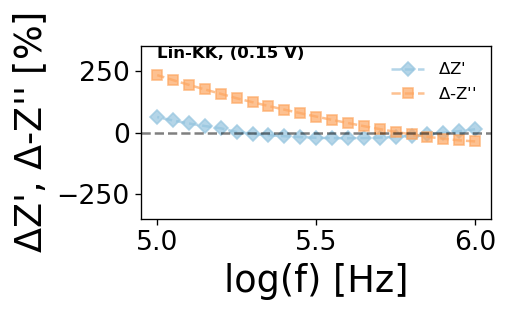

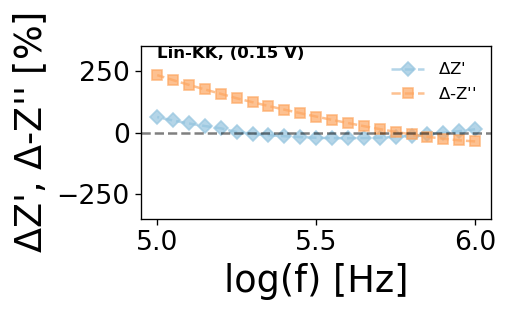

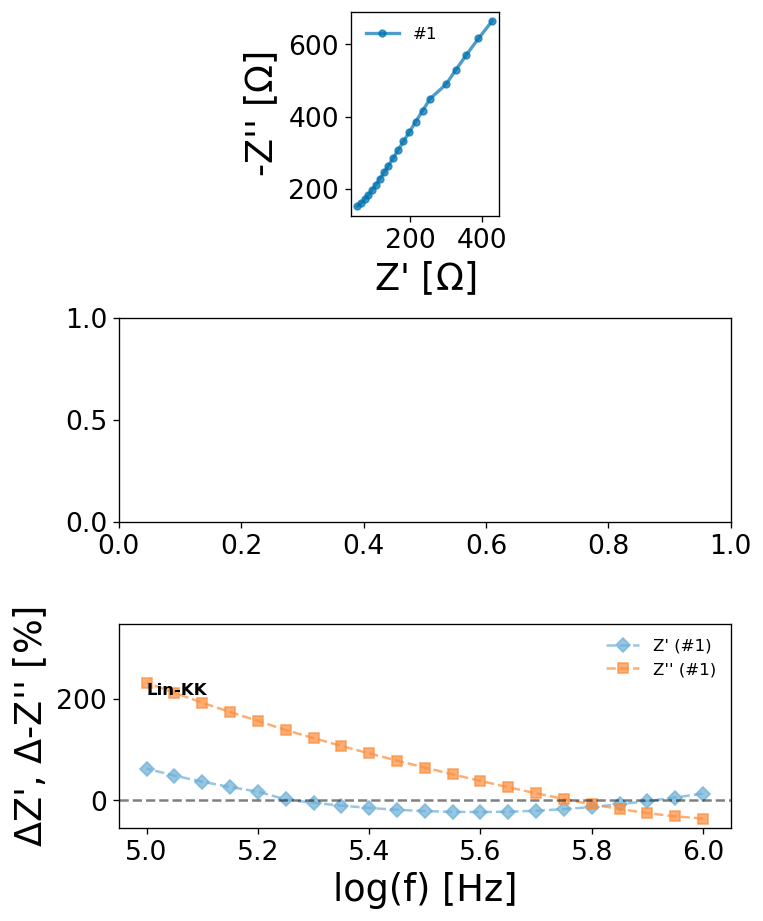

In [18]:
#THIS IS THE LINEAR KRAMER KRONIG ANALYSIS SECTION
#NOT NESSESCARY AT THE MOMENT, BUT THIS WILL HELP ADJUST THE MASK
#WILL HELP PREVENT WITH LONG FITTING PROCESSES

mpt_data1.Lin_KK(legend='potential')
ex_num_RC=2
mpt_data1.Lin_KK(legend='potential', num_RC = ex_num_RC)
print()
print('number of RC-elements: [1] = ',int(ex_num_RC*mpt_data1.decade[0]))
mpt_data1.Lin_KK(plot='w_data')

In [20]:
#FIRST BATCH OF FITTED COEFFICIENTS, PLUG BACK INTO THE GUESS FUNCTION TO GET EVEN BETTER BATCH

print(mpt_data1.fit_Rs)
print()
print(mpt_data1.fit_R)
print(mpt_data1.fit_n)
print(mpt_data1.fit_fs)
print()
print(mpt_data1.fit_R2)
print(mpt_data1.fit_n2)
print(mpt_data1.fit_fs2)

[0.33939310882604573]

[838.2107762482949]
[0.9063901752049042]
[26387.067720550822]

[655109.923180833]
[0.6502061292088703]
[1.369205867619109]


In [21]:
guess_package = [mpt_data.fit_Rs[0], mpt_data.fit_R[0], mpt_data.fit_n[0], mpt_data.fit_fs[0], mpt_data.fit_R2[0], mpt_data.fit_n2[0], mpt_data.fit_fs2[0]]
guess_package

AttributeError: type object 'mpt_data' has no attribute 'fit_Rs'

In [37]:
#input: A GUESS PACKAGE OF INITIAL VARIABLE COEFFICIENTS TO CALCULATE THRU CIRCUIT EQ
#output: A NEW GUESS PACKAGE THAT RAN THROUGH ONE ITERATION OF THE GUESS FUNCTION, Possibly use output for another iteration
def guess(guess_package):
    
    #SINGLE ITERATION OF THE GUESS PROCESS
    #USE THIS FUNCTION TO GET CLOSER TO THE IDEAL COEFFICIENTS FOR Rs, R, n, fs, R2, n2, fs2
    #REPEAT THIS FUNCTION UNTIL THE THRESHOLD IS ACHEIVED
    
    params = Parameters()
    
    #adding to the parameters package to send to the fitting function
    params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=guess_package[0]*100)
    params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=guess_package[1]*10)
    params.add('n', value=guess_package[2], min=.65, max=1.2)
    params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
    params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=guess_package[4]*10)
    params.add('n2', value=guess_package[5], min=.65, max=1.2)
    params.add('fs2', value=guess_package[6], min=10**-2, max=10**1)
    
    #Call to the fitting function given by PyEIS
    mpt_data.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
    
    #maybe take a look at the plots,may help for accuracy, don't really need it...
    #mpt_data.EIS_plot(fitting = 'on')
    
    
    #print out the values
    print(mpt_data.fit_Rs)
    print()
    print(mpt_data.fit_R)
    print(mpt_data.fit_n)
    print(mpt_data.fit_fs)
    print()
    print(mpt_data.fit_R2)
    print(mpt_data.fit_n2)
    print(mpt_data.fit_fs2)
    
    #export the new guess package
    guess_package =  ([mpt_data.fit_Rs[0],mpt_data.fit_R[0],mpt_data.fit_n[0],mpt_data.fit_fs[0],mpt_data.fit_R2[0],mpt_data.fit_n2[0],mpt_data.fit_fs2[0]])
    return guess_package

In [38]:
new_guess_package = [i for i in guess(guess_package)]

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 448
    # data points      = 160
    # variables        = 7
    chi-square         = 118.677858
    reduced chi-square = 0.77567228
    Akaike info crit   = -33.8017705
    Bayesian info crit = -12.2755538
[[Variables]]
    Rs:   37.9421650 +/- 2.99206679 (7.89%) (init = 46.02671)
    R:    3041.08975 +/- 21.9832267 (0.72%) (init = 2950.475)
    n:    0.83780759 +/- 0.00320634 (0.38%) (init = 0.8464271)
    fs:   22278.1849 +/- 240.378224 (1.08%) (init = 22910.72)
    R2:   55734.8108 +/- 4383.85918 (7.87%) (init = 557348.1)
    n2:   0.76527960 +/- 0.01373443 (1.79%) (init = 0.7071255)
    fs2:  3.10467778 +/- 1.49961220 (48.30%) (init = 0.07673174)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.999
    C(n2, fs2) =  0.957
    C(R2, n2)  = -0.944
    C(R, n2)   =  0.903
    C(R, fs)   = -0.891
    C(R, fs2)  =  0.804
    C(R, n)    = -0.803
    C(R, R2)   = -0.786
    C(n, fs)   = 

In [20]:
new_guess_package

SyntaxError: EOL while scanning string literal (<ipython-input-20-07cf1a9457fb>, line 1)

In [40]:
guess_package

[46.026712186410975,
 2950.475404167372,
 0.8464270792517148,
 22910.72221538668,
 557348.1023240507,
 0.7071255497353838,
 0.07673173553736744]

In [41]:
#THIS VERIFIES WHETHER OR NOT WE'VE ACHEIVED A SATISFACTORY COEFFICIENT PACKAGE
#IF THIS DOESN'T RETURN TRUE, WE RUN THE GUESSER UNTIL IT DOES
def thresh_verif(before, after):
    try:
        total = 0
        for i in range(len(before)):
            total += (before[i] - after[i])
        print(total)    
        return abs(total) <= 1e-10
    except IndexError as e:
        #IF LISTS AREN'T THE SAME LENGTH
        print("Lists are not the same length")
        return

In [42]:
thresh_verif(guess_package, new_guess_package)

502160.2215366783


False

In [43]:
new_new_guess_package = guess(new_guess_package)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 249
    # data points      = 160
    # variables        = 7
    chi-square         = 98.2199122
    reduced chi-square = 0.64196021
    Akaike info crit   = -64.0743758
    Bayesian info crit = -42.5481591
[[Variables]]
    Rs:   36.4336880 +/- 2.82663370 (7.76%) (init = 37.94217)
    R:    3087.51280 +/- 19.6621375 (0.64%) (init = 3041.09)
    n:    0.83347335 +/- 0.00288009 (0.35%) (init = 0.8378076)
    fs:   21870.7403 +/- 217.031434 (0.99%) (init = 22278.18)
    R2:   25921.0273 +/- 4755.80313 (18.35%) (init = 55734.81)
    n2:   0.80612989 +/- 0.01446770 (1.79%) (init = 0.7652796)
    fs2:  9.99999970 +/- 1.80581798 (18.06%) (init = 3.104678)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) =  0.999
    C(n2, fs2) = -0.953
    C(R2, n2)  = -0.938
    C(R, fs)   = -0.885
    C(R, n2)   =  0.875
    C(R, n)    = -0.782
    C(R, fs2)  = -0.765
    C(n, fs)   =  0.758
    C(R, R2)   = -0

In [44]:
thresh_verif(new_guess_package, new_new_guess_package)

30169.38165853327


False

In [45]:
new_new_new_guess_package = guess(new_new_guess_package)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 160
    # variables        = 7
    chi-square         = 98.2199122
    reduced chi-square = 0.64196021
    Akaike info crit   = -64.0743758
    Bayesian info crit = -42.5481591
[[Variables]]
    Rs:   36.4336880 +/- 2.82669581 (7.76%) (init = 36.43369)
    R:    3087.51280 +/- 19.6711620 (0.64%) (init = 3087.513)
    n:    0.83347335 +/- 0.00288054 (0.35%) (init = 0.8334733)
    fs:   21870.7403 +/- 217.098084 (0.99%) (init = 21870.74)
    R2:   25921.0273 +/- 4757.85181 (18.36%) (init = 25921.03)
    n2:   0.80612989 +/- 0.01447511 (1.80%) (init = 0.8061299)
    fs2:  9.99999970 +/- 2.82142396 (28.21%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.999
    C(n2, fs2) =  0.953
    C(R2, n2)  = -0.938
    C(R, fs)   = -0.885
    C(R, n2)   =  0.876
    C(R, n)    = -0.782
    C(R, fs2)  =  0.765
    C(n, fs)   =  0.758
    C(R, R2)   = -0.745
 

In [46]:
thresh_verif(new_new_guess_package, new_new_new_guess_package)

3.154809746774845e-12


True

In [47]:
#ITERATIVE GUESSER
def guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess):
    guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
    new_guess = guess(guess_package)
    while not thresh_verif(guess_package, new_guess):
        guess_package = new_guess
        new_guess = guess(new_guess)
        print(new_guess)
    return new_guess

In [48]:
#CUMULATION OF THE FUNCTIONS FROM ABOVE

#GUESSES BROUGHT FROM INIT VALUES
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2


#COMPLETE FUNCTION
guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 495
    # data points      = 160
    # variables        = 7
    chi-square         = 98.2199118
    reduced chi-square = 0.64196021
    Akaike info crit   = -64.0743764
    Bayesian info crit = -42.5481597
[[Variables]]
    Rs:   36.4338586 +/- 2.82658380 (7.76%) (init = 40)
    R:    3087.50794 +/- 19.6585418 (0.64%) (init = 2959)
    n:    0.83347406 +/- 0.00287959 (0.35%) (init = 0.8)
    fs:   21870.8087 +/- 216.994229 (0.99%) (init = 23023)
    R2:   25921.0300 +/- 4755.04107 (18.34%) (init = 258738)
    n2:   0.80612895 +/- 0.01446491 (1.79%) (init = 0.8)
    fs2:  9.99999989 +/- 2.81936919 (28.19%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.999
    C(n2, fs2) =  0.953
    C(R2, n2)  = -0.938
    C(R, fs)   = -0.885
    C(R, n2)   =  0.875
    C(R, n)    = -0.782
    C(R, fs2)  =  0.764
    C(n, fs)   =  0.758
    C(R, R2)   = -0.745
    C(fs, n2)  = -0.739
  

[36.433858555166935,
 3087.5079395526755,
 0.833474063752542,
 21870.80868151527,
 25921.03004816229,
 0.8061289476777818,
 9.999999885298356]

In [21]:
mpt_data.EIS_plot(fitting = 'on')

AttributeError: type object 'mpt_data' has no attribute 'EIS_plot'